In [47]:
import pandas as pd
from evaluate_regression_models import evaluate_regression_models
from visualize_model_comparison import visualize_model_comparison
from one_hot_encoding import one_hot_encoding

df = pd.read_csv("housingdata.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


| CRIM    | ZN   | INDUS   | CHAS   | NOX   | RM    | AGE   | DIS    | RAD   | TAX   | PTRATIO   | B      | LSTAT   | MEDV   | AGE_GROUP_Young   | AGE_GROUP_Middle-aged   | AGE_GROUP_Old   | CRIME_RATE_GROUP_Low   | CRIME_RATE_GROUP_Medium   | CRIME_RATE_GROUP_High   | DISTANCE_TO_CENTER_Near   | DISTANCE_TO_CENTER_Medium   | DISTANCE_TO_CENTER_Far   | ACCESSIBILITY_Bad   | ACCESSIBILITY_Medium   | ACCESSIBILITY_Good   | TAX_GROUP_Low   | TAX_GROUP_Medium   | TAX_GROUP_High   | PTRATIO_GROUP_Low   | PTRATIO_GROUP_Medium   | PTRATIO_GROUP_High   | B_GROUP_Low   | B_GROUP_Medium   | B_GROUP_High   | LSTAT_GROUP_Low   | LSTAT_GROUP_Medium   | LSTAT_GROUP_High   | CRIME_AND_LSTAT_High_High   | CRIME_AND_LSTAT_High_Low   | CRIME_AND_LSTAT_High_Medium   | CRIME_AND_LSTAT_Low_High   | CRIME_AND_LSTAT_Low_Low   | CRIME_AND_LSTAT_Low_Medium   | CRIME_AND_LSTAT_Medium_High   | CRIME_AND_LSTAT_Medium_Low   | CRIME_AND_LSTAT_Medium_Medium   | DIS_AND_RAD_Far_Bad   | DIS_AND_RAD_Far_Good   | DIS_AN

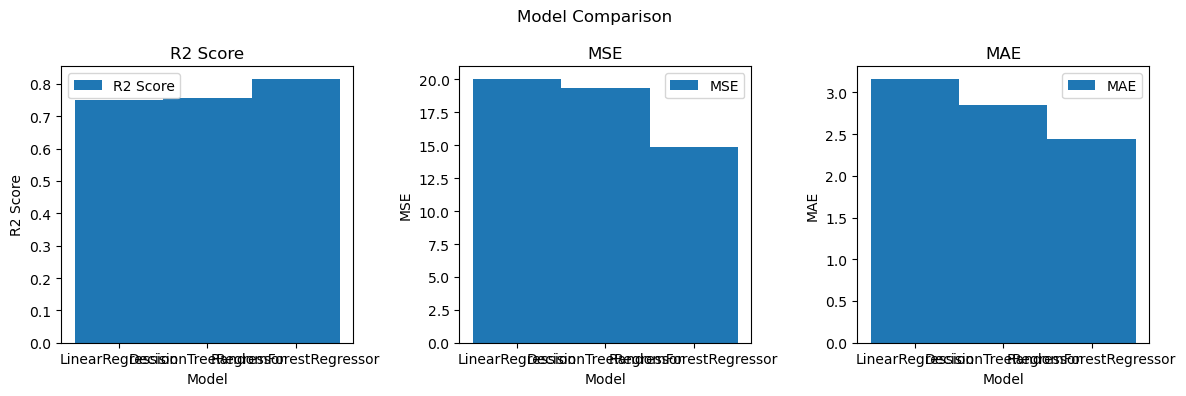

In [48]:
import numpy as np

# CHAS 컬럼의 누락된 값을 최빈값으로 채웁니다.
df['CHAS'] = df['CHAS'].fillna(mode_chas)

# CRIM, ZN, LSTAT 컬럼의 누락된 값을 중앙값으로 채웁니다.
for col in ['CRIM', 'ZN', 'LSTAT']:
    df[col] = df[col].fillna(df[col].median())

# AGE 컬럼의 누락된 값을 평균으로 채웁니다.
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

# INDUS 컬럼의 누락된 값이 있는 행을 삭제합니다.
df = df.dropna(subset=['INDUS'])

# 범주형 컬럼을 추가합니다.
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, df['AGE'].quantile(0.33), df['AGE'].quantile(0.67), np.inf], labels=['Young', 'Middle-aged', 'Old'])
df['CRIME_RATE_GROUP'] = pd.cut(df['CRIM'], bins=[0, df['CRIM'].quantile(0.33), df['CRIM'].quantile(0.67), np.inf], labels=['Low', 'Medium', 'High'])
df['DISTANCE_TO_CENTER'] = pd.cut(df['DIS'], bins=[0, df['DIS'].quantile(0.33), df['DIS'].quantile(0.67), np.inf], labels=['Near', 'Medium', 'Far'])
df['ACCESSIBILITY'] = pd.cut(df['RAD'], bins=[0, df['RAD'].quantile(0.33), df['RAD'].quantile(0.67), np.inf], labels=['Bad', 'Medium', 'Good'])
df['TAX_GROUP'] = pd.cut(df['TAX'], bins=[0, df['TAX'].quantile(0.33), df['TAX'].quantile(0.67), np.inf], labels=['Low', 'Medium', 'High'])
df['PTRATIO_GROUP'] = pd.cut(df['PTRATIO'], bins=[0, df['PTRATIO'].quantile(0.33), df['PTRATIO'].quantile(0.67), np.inf], labels=['Low', 'Medium', 'High'])
df['B_GROUP'] = pd.cut(df['B'], bins=[0, df['B'].quantile(0.33), df['B'].quantile(0.67), np.inf], labels=['Low', 'Medium', 'High'])
df['LSTAT_GROUP'] = pd.cut(df['LSTAT'], bins=[0, df['LSTAT'].quantile(0.33), df['LSTAT'].quantile(0.67), np.inf], labels=['Low', 'Medium', 'High'])

# 조합 컬럼을 추가합니다.
df['CRIME_AND_LSTAT'] = df['CRIME_RATE_GROUP'].astype(str) + "_" + df['LSTAT_GROUP'].astype(str)
df['DIS_AND_RAD'] = df['DISTANCE_TO_CENTER'].astype(str) + "_" + df['ACCESSIBILITY'].astype(str)
df['NOX_AND_INDUS'] = pd.cut(df['NOX'] * df['INDUS'], bins=[0, (df['NOX'] * df['INDUS']).quantile(0.33), (df['NOX'] * df['INDUS']).quantile(0.67), np.inf], labels=['Low', 'Medium', 'High'])

# 원-핫 인코딩을 수행할 컬럼 목록
columns_to_encode = ['AGE_GROUP', 'CRIME_RATE_GROUP', 'DISTANCE_TO_CENTER', 'ACCESSIBILITY',
                     'TAX_GROUP', 'PTRATIO_GROUP', 'B_GROUP', 'LSTAT_GROUP',
                     'CRIME_AND_LSTAT', 'DIS_AND_RAD', 'NOX_AND_INDUS']

# 원-핫 인코딩 수행
df = one_hot_encoding(df, columns_to_encode)

# 회귀 모델 평가 및 시각화
results = evaluate_regression_models(df, 'MEDV')
visualize_model_comparison(results)
